## Deep Feedforward Networks

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch

%matplotlib inline

#### Feedforward and XOR

El autor sugiere revisar el ejemplo XOR, donde hay 4 posibles escenarios, es decir:

$$
X = \left \{ [0, 0], [1, 0], [0, 1], [1, 1] \right \}
$$

Entonces tenemos una funcion que es la verdadera $f^{*}$ y otra que es una aproximacion $f$, un intento por ser similar a la verdadera. Hay muchas formas de medir la diferencia o similitud entre ambas, un MSE loss esta dado de la siguiente forma:

$$
J(\theta) = \frac{1}{4}\sum^{}_{x \in X} \left [ f^*(x) - f(x; \theta) \right ]^2
$$

In [25]:
# basicamente son dos funciones que pueden ser

def true_fn(x):
    return 'Im true'

def estimated_fn(x, theta):
    return 'Im trying to be true'

Si ```true_fn``` es lineal, seria muy facil lograr estimarla, simplemente buscando unos parametros $\theta$ que minimicen $J(\theta)$. Pero que pasa cuando no conocemos ```true_fn```, y si es no lineal? Como se puede aproximar a esta funcion?
Aqui es importante saber que $f(x; \theta)$ puede ser bastante compleja, teniendo varias funciones dentro de si misma, algo como $f(x; w, W) = f^2(f^1(x;w);W)$, es decir, $f$ tiene dos capas internas $f^1$ y $f^2$. Donde cada capa puede ser lineal o no lineal.
Una solucion a el problema XOR esta dada por la siguiente funcion compuesta por dor funciones:

$$
f(x; W, c, w, b) = w^T max \left \{ 0, W^Tx + c \right \} + b
$$

Notese que $\theta$ esta compuesto por los parametros $W, c, w, b$. Y aqui tenemos que la primera funcion es $h = f^1(x) = max \left \{ 0, W^Tx + c \right \}$ y la segunda es $f^2(h) = w^T h + b$. La funcion $max$ agrega no linealidad a nuestra ecuacion.

In [26]:
# entonces la solucion al XOR estaria dada por lo siguiente

W = np.array(
    [
        [1, 1],
        [1, 1]
    ]
)
c = np.array([0, -1])
w = np.array([1, -2])
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0], 
    [1, 1]
])

XW_c= X@W + c
print('XW + c')
print(XW_c)
print('-----')

h = np.where(XW_c > 0 , XW_c, 0)
print('h')
print(h)
print('-----')

y = h@w # en este caso b = 0
print('y')
print(y) # este es el resultado correcto

XW + c
[[ 0 -1]
 [ 1  0]
 [ 1  0]
 [ 2  1]]
-----
h
[[0 0]
 [1 0]
 [1 0]
 [2 1]]
-----
y
[0 1 1 0]


#### Learning Conditional Distributions with Maximum Likelihood

El autor sostiene que muchas de las redes neuronales que hoy en dia se entrenan, hacen uso del Maximum Likelihood para estimar la similitud entre la verdadera distribucion y la distribucion del modelo. Consecuentemente se puede usar *cross entropy* para maximizar la verosimilitud:

$$
J(\theta) = -E_{X,Y \sim \hat{p_{data}}} \left \| log p_{model}(y | x) \right \|
$$

Si se revisa la ecuacion para el *cross entropy* para datos discretos tenemos que:

$$
H(P,Q) = -\sum^{}_{x \in X} p(x) log q(x)
$$

Entonces se puede plantear lo siguiente:

In [27]:
# tenemos los datos sinteticos que provienen de la siguiente funcion verdadera
def true_fn(x):
    if (-1)**x < 0:
        return 0
    else:
        return 1

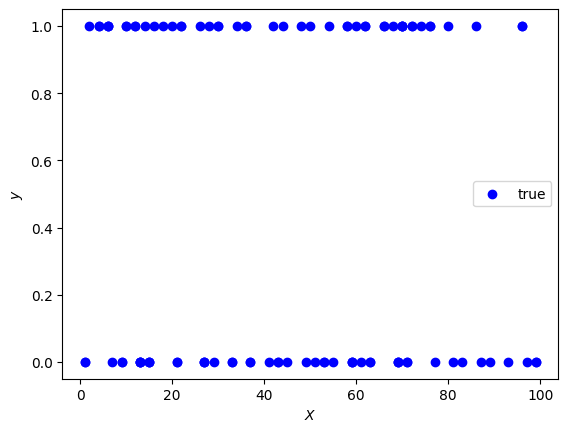

In [28]:
# los valores de X
X = np.random.randint(1, 100, 100)
# los valores de y
y = np.array(list(map(true_fn, X)))
# la grafica
plt.scatter(X, y, color='blue', label='true')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Claramente estamos ante una funcion no lineal (en la practica no sabemos cual es la funcion verdadera, sino que sentido tendria el Deep Learning).

In [29]:
# definicion de una funcion que "intenta" aproximarse a la verdadera funcion
def estimated_fn(x):
    if x > 30:
        return 0.99
    else:
        return 0.01

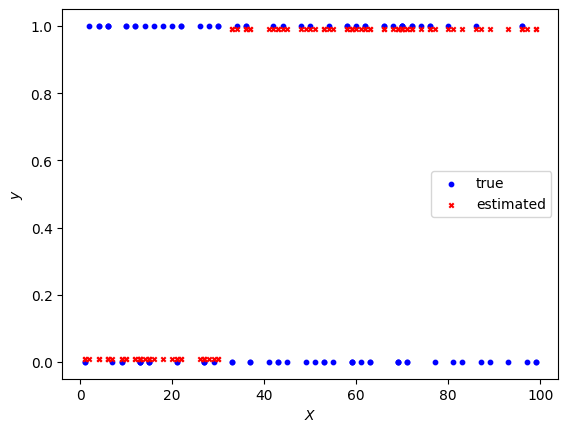

In [30]:
# obtengo valores estimados
y_hat = np.array(list(map(estimated_fn, X)))
# grafica contra los valores verdaderos
plt.scatter(X, y, color='blue', label='true', s=10)
plt.scatter(X, y_hat, color='red', label='estimated', marker='x', s=10)
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [31]:
# y se puede obtener el cross entropy de la siguiente forma
def cross_entropy(y_true, y_estimated):
    return -np.sum(y_true*np.log(y_estimated) + ((1 - y_true)*np.log(1 - y_estimated)))

print(cross_entropy(y, y_hat))

244.54638564248341


Cabe notar que los modelos estimados no pueden arrojar probabilidades estimadas de $0$ o $1$ porque tendriamos un problema a la hora de calcular el *cross entropy* (logaritmos de ceros y unos), por esta razon es que las funciones de activacion esta estructuradas para evitar este problema, por ejemplo la *logistic regression*.

Es muy importante entender el papel de los gradientes cuando un algoritmo debe aprender.

<img alt="title" height="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/2880px-Logistic-curve.svg.png" width="600"/>

Cuando los gradientes son bajos se puede decir que el algoritmo aprende muy poco, un ejemplo de como puede pasar esto es con la funcion *sigmoid*, cuando el valor de $x$ en $f(x)$ (siendo $f$ una funcion sigmoid) es muy grande o muy bajo, los gradientes de la funcion seran bajos.

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print('Un incremento del 100% partiendo desde x = 0 a x = 1:', sigmoid(0), '->' ,sigmoid(1))
print('Un incremento del 100% partiendo desde x = 10 a x = 20:', sigmoid(10), '->' ,sigmoid(20))

Un incremento del 100% partiendo desde x = 0 a x = 1: 0.5 -> 0.7310585786300049
Un incremento del 100% partiendo desde x = 10 a x = 20: 0.9999546021312976 -> 0.9999999979388463


Entonces, al tener un gradiente tan bajo, los cambios en los parametros producto de este gradiente seran muy bajos y por ende no habra mucho efecto en la funcion de costos. Al final el aprendizaje sera nulo o mas lento.

Segun el autor, la parte de la ecuacion $log q(x)$ ayuda a compensar el efecto que puede dar el ```exp``` en muchas funciones de activacion.

Por otro lado, cuando usamos el MSE o MAE no tenemos los beneficios que presenta el *cross entropy* y se puede caer facilmente en problemas de bajos gradientes. Por esto, es muy usual ver el *cross entropy* incluso cuando no es necesario estimar por completo $p(y|x)$.

#### Sigmoid units for Bernoulli output distributions

Supongamos que tenemos una variable binaria $y$, para predecirla estariamos enfrentando un problema de clasificacion, donde se busca predecir la probabilidad de exito ($1$) o fracaso ($0$). La cuestion es definir una distribucion Bernoulli para los $y$ que dependa de $x$, es decir $p(y|x$).

Entonces el output de la red debe estar acotado en el intervalo $[0, 1]$. Un ejemplo podria ser una funcion de esta forma:

$$
P(y = 1|x) = max \left \{ 0, min \left \{ 1, w^Th + b \right \} \right \}
$$

Que tendria la siguiente forma:

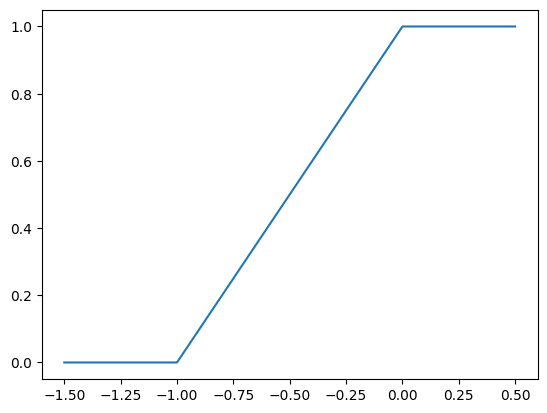

In [33]:
def estimated_fn(h):
    # suponemos fijos a w = 1 y b = 1
    sub_r = np.where(h + 1 > 1, 1, h + 1)
    return sub_r if sub_r > 0 else 0
x = np.linspace(-1.5, 0.5, 1000)
y_hats = np.array(list(map(estimated_fn,x)))
plt.plot(x, y_hats)
plt.show()

Aqui el problema estaria en que una vez que tengamos valores muy bajos o muy altos en la funcion, el gradiente seria $0$, entonces nuestro algoritmo aprendizaje no tendria **guia** para saber hacia donde deben cambiar los parametros.

Podria traducirse que si por alguna razon el pronostico es $0$ y el valor real es $1$, el gradiente no nos dice como cambiar los parametros para acercarnos a un pronostico de $1$:

In [34]:
# calculo empirico de un gradiente
y1 = estimated_fn(-1.25)
y2 = estimated_fn(-1.24)

print('La variacion del y es: ', y1 - y2)

La variacion del y es:  0


Una alternativa podria ser usar la funcion sigmoid:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

La cual tiene la siguiente forma:

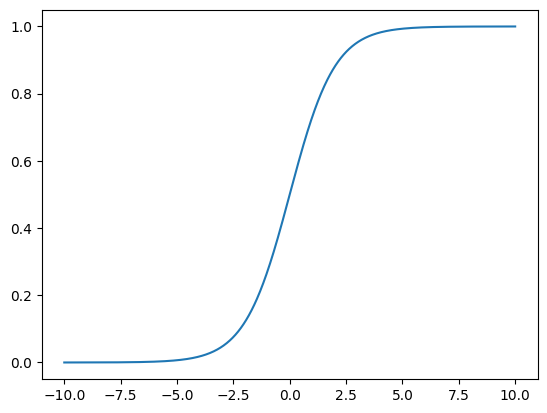

In [35]:
def estimated_fn(h):
    return 1 / (1 + np.exp(-h))
x = np.linspace(-10, 10, 1000)
y_hats = np.array(list(map(estimated_fn,x)))
plt.plot(x, y_hats)
plt.show()

Como ya se vio antes, los gradientes seran diferentes de $0$ pero seguimos teniendo problemas porque los gradientes en los puntos extremos son muy bajos, casi que anulan el aprendizaje.

Aqui es donde es muy importante usar el *cross entropy* para el aprendizaje, al tener el $log(q)$, se contrarresta el efecto que agrega la parte exponencial del sigmoid, y por esto los gradientes no seran tan bajos:

In [36]:
# caso 1: El pronostico es muy malo, la red predice casi 0 pero el valor real es 1
y_hat_1 = estimated_fn(-10)
y_hat_2 = estimated_fn(-10.05)
y = 1
ce1 = cross_entropy(y, y_hat_1)
ce2 = cross_entropy(y, y_hat_2)

print('El gradiente sobre la funcion de costo es: ', ce1 - ce2)

El gradiente sobre la funcion de costo es:  -0.049997785917366144


In [37]:
# caso 2: El pronostico es muy bueno, la red predice casi 1 y el valor real es 1
y_hat_1 = estimated_fn(10)
y_hat_2 = estimated_fn(10.05)
y = 1
ce1 = cross_entropy(y, y_hat_1)
ce2 = cross_entropy(y, y_hat_2)

print('El gradiente sobre la funcion de costo es: ', ce1 - ce2)

El gradiente sobre la funcion de costo es:  2.214082634115082e-06


Ya aqui tenemos una ganancia con respecto a nuestra primera funcion de aproximacion, los buenos pronosticos deben quedarse como tal y los que son muy malos hay que mejorarlos mucho.

Pero que pasa si no se usa un *cross entropy* sino un MSE?

In [38]:
def mse(y_true, y_estimated):
    return np.mean(np.sum((y_true - y_estimated)**2))

In [39]:
# caso 1: El pronostico es muy malo, la red predice casi 0 pero el valor real es 1
y_hat_1 = estimated_fn(-10)
y_hat_2 = estimated_fn(-10.05)
y = 1
mse1 = mse(y, y_hat_1)
mse2 = mse(y, y_hat_2)

print('El gradiente sobre la funcion de costo es: ', mse1 - mse2)

El gradiente sobre la funcion de costo es:  -4.427773022230852e-06


In [40]:
# caso 2: El pronostico es muy bueno, la red predice casi 1 y el valor real es 1
y_hat_1 = estimated_fn(10)
y_hat_2 = estimated_fn(10.05)
y = 1
mse1 = mse(y, y_hat_1)
mse2 = mse(y, y_hat_2)

print('El gradiente sobre la funcion de costo es: ', mse1 - mse2)

El gradiente sobre la funcion de costo es:  1.9611863399895653e-10


El gradiente resultante cuando la prediccion es mala, es mas bajo que cuando usamos *cross entropy*, entonces el aprendizaje sera mas lento en este caso (MSE).

Se puede entender mas sobre el efecto de la funcion sigmoid dentro de la funcion de costo de la siguiente manera:

In [41]:
# creacion de multiples resultados de la red para luego calcular el cross entropy
hs = np.random.uniform(-10, 10, 1000)
y_hats = np.array(list(map(estimated_fn, hs)))
ys = np.random.randint(0, 2, 1000)
yhs = list(zip(ys, y_hats))

def cross_entropy(params):
    return -np.sum(params[0]*np.log(params[1]) + ((1 - params[0])*np.log(1 - params[1])))

ces = np.array(list(map(cross_entropy, yhs)))
data = list(zip(ces, ys, y_hats))
# sort by cross entropy para ver el comporamiento de la funcion de costo
data.sort(key=lambda x: x[0])

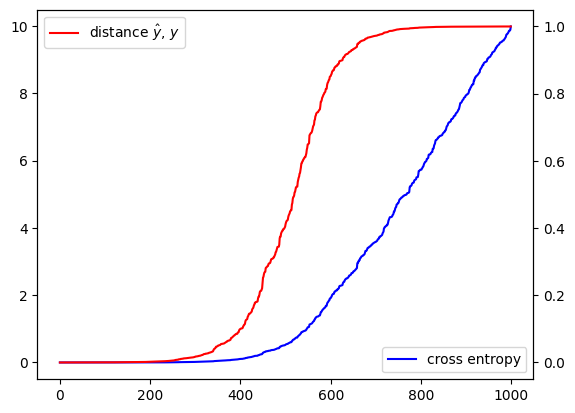

In [42]:
plt.plot(np.array(data)[:, 0], label='cross entropy', color='blue')
plt.legend(loc='lower right')
# plot true values in second axis
plt.twinx()
# plot the distance between the true value and the predicted value
plt.plot(np.abs(np.array(data)[:, 1] - np.array(data)[:, 2]), label='distance $\hat{y}$, $y$', color='red')
plt.legend(loc='upper left')
plt.show()

Se puede ver cuando la distancia entre el valor predicho y el valor real es baja, la funcion de costo es baja, y viceversa. Basicamente el gradiente de la funcion de costo es bajo cuando la prediccion es correcta, y es alto cuando la prediccion es incorrecta. No es el mismo comportamiento que se tiene con el MSE, donde cada vez que $\sigma(z)$ se satura, el gradiente del MSE sera muy bajo. Es decir, ya sea que el modelo realice una prediccion muy mala o muy buena, la capacidad de aprendizaje estara limitada.

El autor demuestra que este comportamiento sigue una funcion $softplus$ que tiene la siguiente estructura:

$$
softplus(x) = \log(1 + e^x)
$$

#### Softmax units for Multinoulli output classification

En este caso, nuestro objetivo es aproximar la funcion a una funcion de probabilidad verdadera que arroja probabilidades para distintas categorias. Anteriormente solo se intentaba predecir una variable binaria, un escalar, en este caso el resultado debe ser un vector, donde cada elemento $i$ del vector corresponde a la probabilidad de la categoria $i$.

Es importante notar que la funcion $sigmoid$ cumplia requisitos para considerarse una aproximacion a una distribucion de probabilidad. En este caso se debe tener en cuenta que la funcion que podemos usar como aproximacion cumpla con la propiedad de que la suma de las probabilidades de todas las categorias debe ser igual a $1$, este caso es verdadero para la distribucion verdadera que se desea aproximar, pero no para la funcion $sigmoid$. Sin embargo el autor recalca como se puede llegar a funcion que nos ayude a cumplir con esta propiedad:

Teniendo un $z = W^Th + b$, el cual es un vector de dimension $K$ donde $K$ es el numero de clases. Cada $z_i$ se entiende como:

$$
z_i = \log \widetilde{P}(y=i|x)
$$

Se puede ver como una probabilidad no normalizada, para normalizarla (y asegurarnos que sume $1$) se realiza lo siguiente:

$$
softmax(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

Al tener como objectivo maximizar la verosimilitud (ya que si usamos MSE tendremos problemas de saturacion), es decir maximizar $\log P(y = i; x) = \log softmax(x)$ se tiene que:

$$
\log softmax(z)_i = z_i - \log \sum_{j=1}^K e^{z_j}
$$

##### Intuicion acerca del softmax

El segundo termino de la ecuacion $\log \sum_{j=1}^K e^{z_j}$ se puede interpretar como $max_j z_j$ debido a que las demas probabilidades dentro del vector no seran generalmente significativas con respecto a la mayor probabilidad estimada.Entonces cuando el modelo predice correctamente la clase se tendria que $z_j - z_j$ y se anularian, no sumaria nada al costo y los gradientes se enfocarian en aquellas estimaciones que no esten correctas. Por otro lado, la funcion de costo penalizara fuertemente a las demas estimaciones que no sean la correcta.

Hay que tener en cuenta que la ecuacion:$\log softmax(z)_i = z_i - \log \sum_{j=1}^K e^{z_j}$ o es la funcion de costo (*cross entropy*).

Por otro lado, usar MSE y softmax no es una buena idea:

In [93]:
MSE = torch.nn.MSELoss()  # error MSE
CCE = torch.nn.CrossEntropyLoss()  # error de categorical cross entropy

# una serie de y verdaderos y predicciones
y_true_1 = torch.tensor([0, 0, 1, 1], dtype=torch.float32)
y_pred_1 = torch.tensor([0.9, 0.1, 0.1, 0.9], dtype=torch.float32)
# y_pred_1.requires_grad = True
y_pred_2 = torch.tensor([0.901, 0.099, 0.0099, 0.901], dtype=torch.float32)

# calculo de los errores
mse_1 = MSE(y_true_1, y_pred_1)
ce_1 = CCE(y_true_1, y_pred_1)
mse_2 = MSE(y_true_1, y_pred_2)
ce_2 = CCE(y_true_1, y_pred_2)

print('MSE gradient: ', mse_1.numpy() - mse_2.numpy())
print('BCE gradient: ', ce_1.numpy() - ce_2.numpy())

MSE gradient:  -0.0429253
BCE gradient:  0.0896709
